<a href="https://colab.research.google.com/github/Sergio-Tellz21/upsrj-machine-learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar Librebrias
1: escribimos las librerias las cuales nos ayudara tanto para mostrar en graficas.





In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline


#Escribimos nuestras variables para leer una base de 500 muestras

In [162]:
#1. Tenemos una base de datos con 500 muestras
#2. tenemos dos features
#3. no hay features  redundantes
#4. numero de features informativos
X, y = make_classification(
    n_samples =500,
    n_features =2,
    n_redundant=0,
    n_informative =2,
    n_clusters_per_class=1,
    random_state = 42
)
print(X)
print(y)


[[ 1.00845498e+00 -1.04700975e+00]
 [ 3.26021382e-01  5.02540973e-01]
 [ 1.02420498e+00 -1.79714286e+00]
 [ 1.21880067e-01  1.05937142e+00]
 [ 3.90997326e-02  3.82369370e-01]
 [ 1.26221796e+00 -7.60726298e-01]
 [ 7.51010599e-01  8.79395978e-01]
 [-7.49552409e-01 -1.31748509e-01]
 [ 3.97777110e-01  6.94304161e-01]
 [ 1.60117355e+00  1.31994147e+00]
 [ 2.65997363e+00 -2.92346297e+00]
 [ 1.39309699e+00 -2.61327073e+00]
 [ 3.25885001e-01 -1.52748814e+00]
 [ 5.54900000e-01  6.62973369e-01]
 [ 1.36121142e-01  1.15068994e+00]
 [ 7.92352807e-01  8.42255922e-01]
 [ 9.46116447e-01  9.05699594e-01]
 [ 1.05575841e-01 -4.29081227e-01]
 [-5.38715030e-04 -1.40426119e+00]
 [ 2.28144543e+00 -1.37667072e+00]
 [ 1.78152502e+00 -1.37344458e+00]
 [ 1.73498800e+00  1.49257599e+00]
 [ 1.49176434e+00 -1.94288103e+00]
 [ 1.09767386e+00  1.07962466e+00]
 [-6.55458394e-01 -9.19380551e-02]
 [-1.31469894e+00 -3.74656287e-01]
 [ 3.05164386e+00  2.25545315e+00]
 [ 2.86514241e+00 -1.49525943e+00]
 [ 1.87384662e+00 -3

## Dividimos datos para entrenamiento y pruebas
 tenemos que empeazr con el entrenamiento y las pruebas usando el 30% o 0.3

In [163]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size =0.3,
    random_state=42
)
print(X_test)

[[ 1.06795223e-01  3.70588612e-01]
 [ 8.72281002e-02  4.60841802e-01]
 [ 2.04683601e+00 -1.55276499e+00]
 [ 1.09944884e+00  9.80628154e-01]
 [ 6.28041016e-01 -2.09605221e+00]
 [-1.12049845e+00 -2.83818959e-01]
 [ 3.06208873e-01 -6.37928510e-02]
 [-2.08342616e-01  2.51396769e-01]
 [ 9.11716224e-02  1.11616734e+00]
 [ 6.46539855e-01  8.11555128e-01]
 [ 1.60117355e+00  1.31994147e+00]
 [ 1.16469581e+00 -1.95890648e+00]
 [ 1.22987564e+00  1.07205422e+00]
 [ 2.94282525e+00 -4.50345197e+00]
 [-4.71295560e-01  4.38936291e-03]
 [ 1.17184505e+00 -7.75241272e-01]
 [ 1.75804982e+00  1.57423275e+00]
 [ 1.83976018e+00  1.51072939e+00]
 [ 2.02462117e-01  5.01611051e-01]
 [ 4.64206642e-01  4.30520917e-01]
 [ 1.78296919e+00  1.52781401e+00]
 [ 2.27894589e+00  1.83784428e+00]
 [ 2.04264126e+00  1.74358113e+00]
 [ 4.07215501e-01 -5.36216044e-01]
 [ 1.40217028e+00  1.15467628e+00]
 [ 1.15372245e+00 -1.69965331e+00]
 [ 2.10777721e-01  6.08618215e-01]
 [ 8.54102853e-01  8.18315813e-01]
 [ 1.49041670e-02 -4

##Escalar los datos para entrenamiento

In [164]:
#Escalamos los datos para procesar
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)
print(X_train)
print(X_test)


[[ 2.78796077e-01 -5.66313563e-01]
 [-1.12130253e+00  8.27359395e-02]
 [-1.04607982e-01  6.02717942e-01]
 [-9.53599754e-02  6.31461576e-01]
 [ 6.74346357e-01 -1.56324613e+00]
 [-1.86845806e+00  1.24682811e-02]
 [-1.07097387e+00  7.41916108e-01]
 [-3.58667198e-01 -8.76108913e-02]
 [-7.78480106e-02 -9.06100391e-01]
 [ 5.20813108e-01  9.77517875e-01]
 [-8.46951934e-01  4.04537634e-01]
 [-4.48504758e-01  5.22155000e-01]
 [-5.09784746e-01  5.07750011e-01]
 [-6.07095104e-01  4.02866498e-01]
 [-7.03801714e-01 -6.94337794e-01]
 [ 3.39723726e-01 -6.53277239e-01]
 [ 2.39686416e+00  1.60162248e+00]
 [-2.10245180e+00 -1.14223877e-01]
 [ 4.23818206e-01  8.22409540e-01]
 [-2.08948150e+00 -8.70042166e-02]
 [ 8.03407372e-03  7.35090411e-01]
 [ 2.14605276e+00  1.58823728e+00]
 [ 3.61829437e-01 -9.75854067e-01]
 [-3.91580356e-01  5.72439048e-01]
 [-1.10982183e+00  2.93422808e-01]
 [-3.76925546e-03  6.76969141e-01]
 [-7.20413720e-01  4.06013814e-01]
 [-1.30806733e-01 -1.01500019e+00]
 [ 1.88633410e+00  1

##Generamos el modelo y lo alimentamos con los resultados del entrenamiento con
.FIT es la parte importante

In [165]:
#Generamos nuestro modelo y lo alimentamos
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

##Creamos nuestra prediccion

In [166]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 0]


##Comparamos lo predicho y la parte que es real

In [167]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))



Accuracy: 0.8466666666666667
Confusion matrix: [[66  9]
 [14 61]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



##en esta parte estamos marcando cada parte que llevara para motrarlo en grafica

In [168]:
def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 200),
      np.linspace(y_min, y_max, 200)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", s=50)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Logistic Regression Decision Boundary")

  plt.show()


#Mostramos la grafica de la parte de Logistic Regression

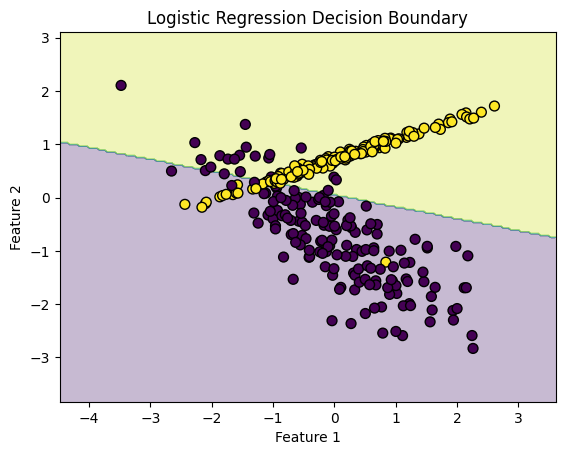

In [169]:
plot_decision_boundary(X_train, y_train, model)

#Pasamos la parte de Logistic Regression a pipeline la cual se tiene que agregar la variable como
1. Pipeline con REGRESIÓN LOGÍSTICA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())

])
pipeline.fit(X_train, y_train)

[[ 1.00845498e+00 -1.04700975e+00]
 [ 3.26021382e-01  5.02540973e-01]
 [ 1.02420498e+00 -1.79714286e+00]
 [ 1.21880067e-01  1.05937142e+00]
 [ 3.90997326e-02  3.82369370e-01]
 [ 1.26221796e+00 -7.60726298e-01]
 [ 7.51010599e-01  8.79395978e-01]
 [-7.49552409e-01 -1.31748509e-01]
 [ 3.97777110e-01  6.94304161e-01]
 [ 1.60117355e+00  1.31994147e+00]
 [ 2.65997363e+00 -2.92346297e+00]
 [ 1.39309699e+00 -2.61327073e+00]
 [ 3.25885001e-01 -1.52748814e+00]
 [ 5.54900000e-01  6.62973369e-01]
 [ 1.36121142e-01  1.15068994e+00]
 [ 7.92352807e-01  8.42255922e-01]
 [ 9.46116447e-01  9.05699594e-01]
 [ 1.05575841e-01 -4.29081227e-01]
 [-5.38715030e-04 -1.40426119e+00]
 [ 2.28144543e+00 -1.37667072e+00]
 [ 1.78152502e+00 -1.37344458e+00]
 [ 1.73498800e+00  1.49257599e+00]
 [ 1.49176434e+00 -1.94288103e+00]
 [ 1.09767386e+00  1.07962466e+00]
 [-6.55458394e-01 -9.19380551e-02]
 [-1.31469894e+00 -3.74656287e-01]
 [ 3.05164386e+00  2.25545315e+00]
 [ 2.86514241e+00 -1.49525943e+00]
 [ 1.87384662e+00 -3

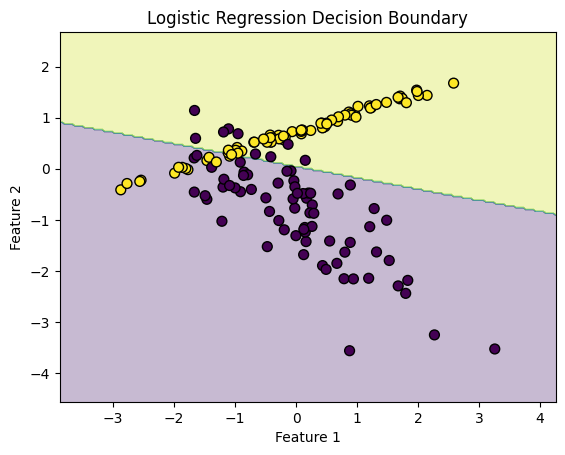

In [171]:

X, y = make_classification(
    n_samples =500,
    n_features =2,
    n_redundant=0,
    n_informative =2,
    n_clusters_per_class=1,
    random_state = 42
)
print(X)
print(y)

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size =0.3,
    random_state=42
)
print(X_test)
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)
print(X_train)
print(X_test)

# Pipeline con REGRESIÓN LOGÍSTICA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())

])
pipeline.fit(X_train, y_train)

#Generamos nuestro modelo y lo alimentamos
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))


def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 200),
      np.linspace(y_min, y_max, 200)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", s=50)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Logistic Regression Decision Boundary")
  plt.show()

plot_decision_boundary(X_test, y_test, pipeline)